In [1]:
# Import packages needed for analysis of data
import pandas as pd
import plotly.express as px
import re
from matplotlib import pyplot as plt 
import numpy as np 
from scipy import stats 
import seaborn as sns
import streamlit as st 

In [2]:
# Read in the data set
df = pd.read_csv("vehicles_us.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [3]:
# Get an example of the DataFrame, print the first and last 5 rows
print(df.head())
print(df.tail())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
       price  model_year           model  condition  cylinders fuel  odometer  \
51520   9249      2013.0   nissan ma

In [4]:
# Check for missing values
print(df.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [5]:
# Check for duplicates in model
print(df['model'].duplicated().sum())

51425


In [6]:
# See if we can't fill in any information missing in the 'cylinders' column by using the duplicates grouped by the 'model' and 'model_year' column
df['cylinders'] = (
    df.groupby(['model', 'model_year'])['cylinders']
      .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
)

In [7]:
# Review how many missing values are now in the cylinders column
print(df['cylinders'].isna().sum())

3645


By using information from duplicates that were grouped by the columns 'model' and 'model_year' we were able to decrease missing values for the 'cylinders' column from a total of 5,260 to 3,645, a difference of 1,615. This will help provide for better calculations and overall data collection.

In [8]:
# By using the newly filled data, we will try and fill in missing data for the column 'is_4wd'
df['is_4wd'] = (
    df.groupby(['model', 'model_year'])['is_4wd']
      .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
)
print(df['is_4wd'].isna().sum())

15487


By using the columns 'model' and 'model_year' we were able to decrease the number of missing values from 25,953 to 15,496; a difference of 10,457.

The thought process behind this was understanding that there were multiples of the same make, model, and year with the possibility that some would have information others were missing, and thus we could use those other entries to fill in missing data.

In [9]:
# Double check calculations are correct and the entire df reflects findings from above
print(df.isna().sum())


price               0
model_year       3619
model               0
condition           0
cylinders        3645
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          15487
date_posted         0
days_listed         0
dtype: int64


There is no reliable way to fill in missing values for the model_year column, we could find the median, or even possibly the average, based off of the information from the other filled in columns, but this will not be accurate and could scew data one way or another when doing a deeper dive into it.

There is no way to fill in the information for the columns 'odometer' and 'paint_color' as these are specific to each individual car, when doing exploratory analysis of the data moving forward it will need to be noted for any calculations that may involve these columns.

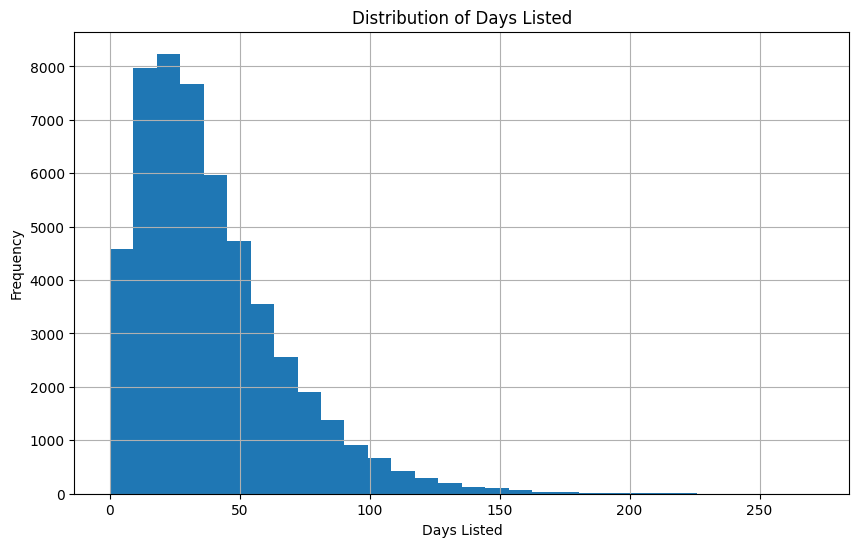

The average amount of time a vehicle spends on the market is 39.55 days.


In [40]:
# Examine the spread for how long vehicles normally sit on the market
df['days_listed'].hist(bins=30, figsize=(10,6))
plt.title('Distribution of Days Listed')
plt.xlabel('Days Listed')
plt.ylabel('Frequency')
plt.show()

# Average amount of time a vehicle stays listed
avg_days_listed = df['days_listed'].mean()
print(f'The average amount of time a vehicle spends on the market is {avg_days_listed:.2f} days.')

We can now start to examine the different variables that lead to the speed with which a vehicle is purchased.

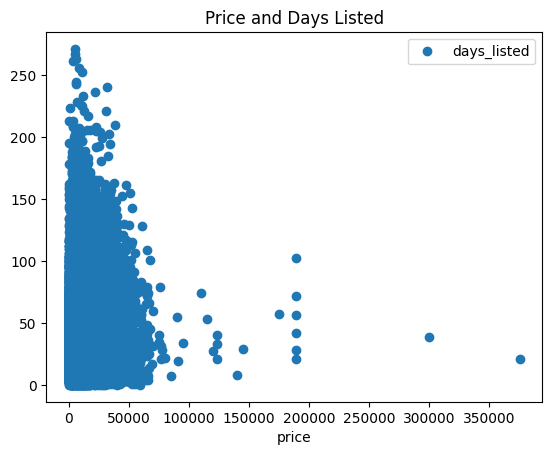

-0.0006821100678298553


In [31]:
df.plot(x='price',y='days_listed',title='Price and Days Listed', style='o')
plt.show()

print(df['price'].corr(df['days_listed']))

From the scatterplot it does not show a relationship between the price of a vehicle and the days it stays listed. The larger cluster towards the left side of the chart suggests that the lower the price, the less days the vehicle was on the market, but there are still a large amount of vehicles that are priced lower than others that spend longer on the market than some outliers in terms of pricing.

When you look at the Correlation Coefficient it verifys the lack of a relationship between these two variables,one that is almost non-existent, this suggests that there are other factors other than price that strongly influences the duration a vehicle stays on the market.

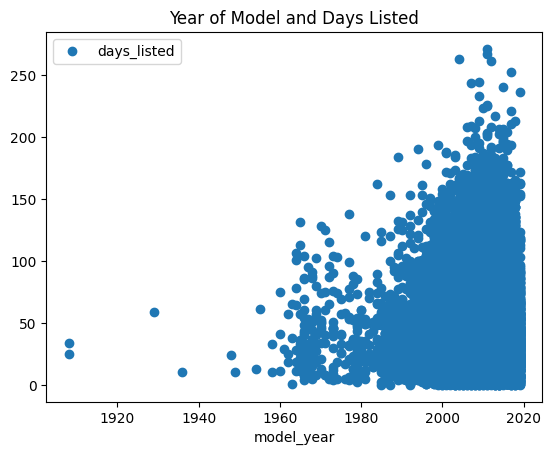

-0.0057033128838531195


In [11]:
df.plot(x='model_year',y='days_listed',title='Year of Model and Days Listed', style='o')
plt.show()

print(df['model_year'].corr(df['days_listed']))

After examining both the chart for Model Year and Days Listed on the Market, there is a stronger correlation, though still not a strong correlation, between the model year and days listed than price and days listed. The cluster around newer vehicles shows fewer days on the market, but yet again there are still a large quantity of newer models that spend longer on the market than the few outliers when comparing model year and days listed. This shows that buyers consider model year as a stronger influence for their purchase than the price.

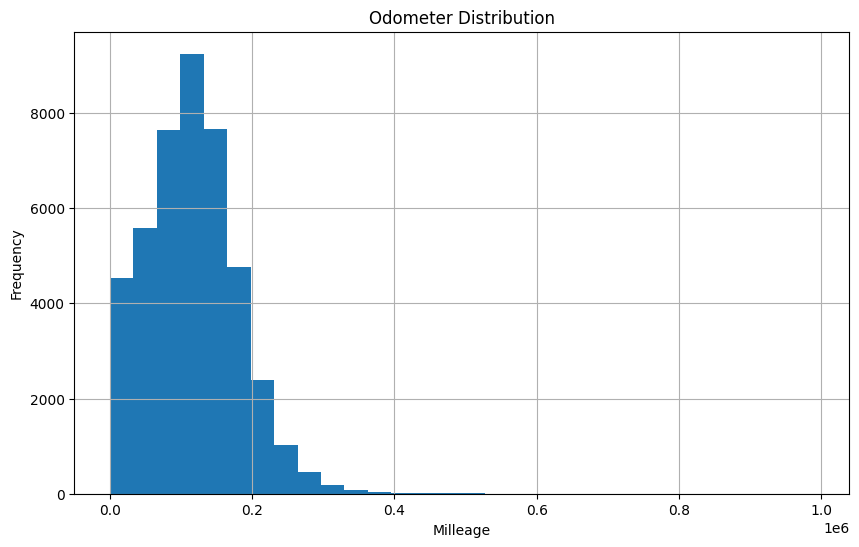

The smallest amount of milleage on a vehicle being sold is 0.00
The average amount of milleage on a vehicle being sold is 115553.46
The largest amount of milleage on a vehicle being sold is 990000.00


In [38]:
# Display the spread of milleage on cars
df['odometer'].hist(bins=30, figsize=(10,6))
plt.title('Odometer Distribution')
plt.xlabel('Milleage')
plt.ylabel('Frequency')
plt.show()

odometer_min = df['odometer'].min()
odometer_max = df['odometer'].max()
odometer_avg = df['odometer'].mean()

print(f'The smallest amount of milleage on a vehicle being sold is {odometer_min:.2f}')
print(f'The average amount of milleage on a vehicle being sold is {odometer_avg:.2f}')
print(f'The largest amount of milleage on a vehicle being sold is {odometer_max:.2f}')

The histogram shows that the majority of the used cars for sale fall into mid-mileage vehicles, with a strong right skew we see that there are fewer vehicles with large quantites of miles on their odometer which suggests there are outliers but not enough to suggest problems with data input. We can address if mileage is a strong factor when purchasing a vehicle, by comparing days listed to the mileage of a car.

In [ ]:
# Examine the correlation between odometer and days listed
print(df['odometer'].corr(df['days_listed']))

0.0038042557961884206


This suggests that milleage on a vehicle is a more significant factor for buyers than price or year of a vehicle. The fewer miles the more likely the vehicle will spend less days on the market. Although it is the strongest relationship at this point in analysis, it still is a very weak relationship suggesting other factors influence buyers decisions.

In [ ]:
# We need to find the times each type of vehicle appears in the DataFrame before we can do any sort of quantitative analysis or graphing due to the fact that the 'model' column is a str type, not a float or int type
model_count = df['model'].value_counts()
print(model_count)

model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64
nan


In [43]:
model_stats = df.groupby('model').agg(
    listing_count=('model', 'size'),
    average_days_listed=('days_listed', 'mean')
).reset_index()

correlation = model_stats['listing_count'].corr(model_stats['average_days_listed'])
print(correlation)

-0.022303311972010832


The correlation coefficient shows that there is almost no relationship between the model of vehicle and the days it stays listed on the market. The more pressing variable would be the milleage on the vehicle itself at this point in our analysis.

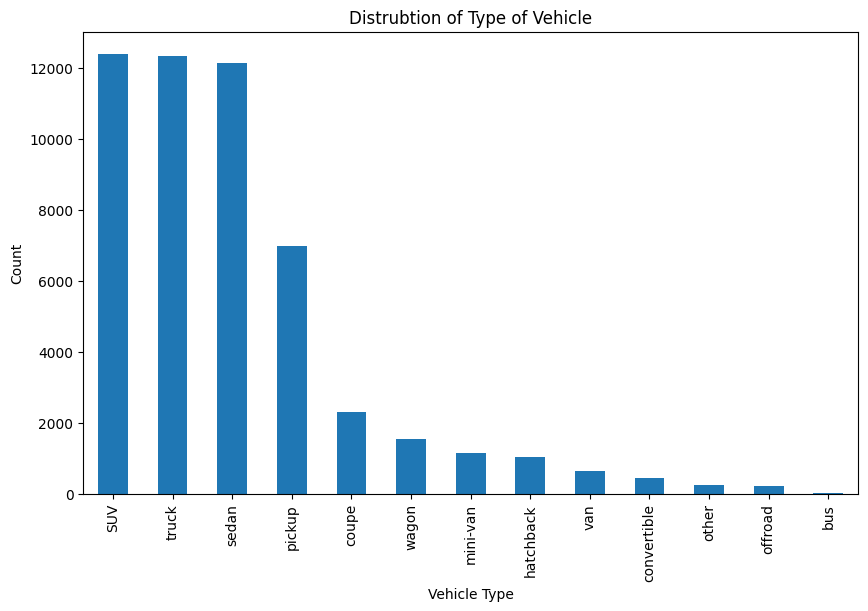

-0.002957855965191103


In [20]:
# Need to find the amount of times specific types of vehicles appear, display the dispersion, and identify if there is any type of correlation between type and the days listed
df['type'].value_counts().plot(
    kind='bar',
    figsize=(10,6),
    title='Distrubtion of Type of Vehicle'
)
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

# Correlation coefficient
type_count = df['type'].value_counts()
df['type_count'] = df.groupby('type')['type'].transform('count')
print(df['type_count'].corr(df['days_listed']))

While the graph displays that SUV's, Trucks, and Sedans are the most popular types of vehicles being sold, the relationship is almost nonexistent between the days listed and what model of vehicle the car being sold is.

In [45]:
# We need to find the times each type of condition appears in the DataFrame before we can do any sort of quantitative analysis or graphing due to the fact that the 'model' column is a str type, not a float or int type 
cond_count = df['condition'].value_counts()

# Add to the DataFrame so we can plot it against the days listed
df['cond_count'] = df.groupby('condition')['condition'].transform('count')

condition
new          37.111888
salvage      39.008696
fair         39.118233
like new     39.166807
excellent    39.611714
good         39.631323
Name: days_listed, dtype: float64


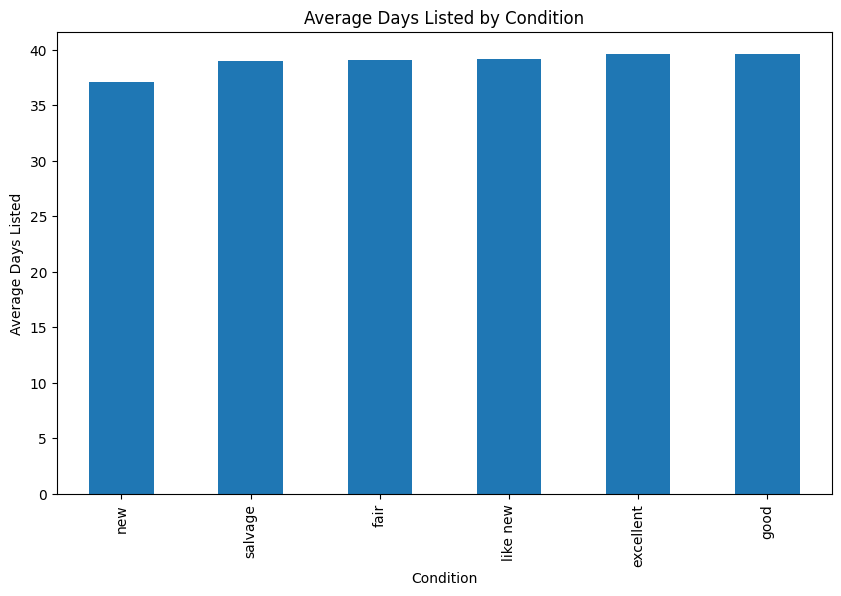

0.0057666317385060275


In [46]:
# Plot to see the relationship between the condition of the vehicle and the average amount of days it spent on the market
avg_days = df.groupby('condition')['days_listed'].mean().sort_values()
print(avg_days)

avg_days.plot(kind='bar', figsize=(10,6))
plt.title('Average Days Listed by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Days Listed')
plt.show()

# Find the correlation between these two factors
print(df['cond_count'].corr(df['days_listed']))

While the graph shows that there is only a minute difference in terms of average days a vehicle (depending on the condition) stays on the market, there is an extremely minute (also almost nonexistent) positive correlation that the better condition a car is in the faster it is to sell. The milleage of a car is still the superior factor when consumers are considering the purchase of a vehicle.

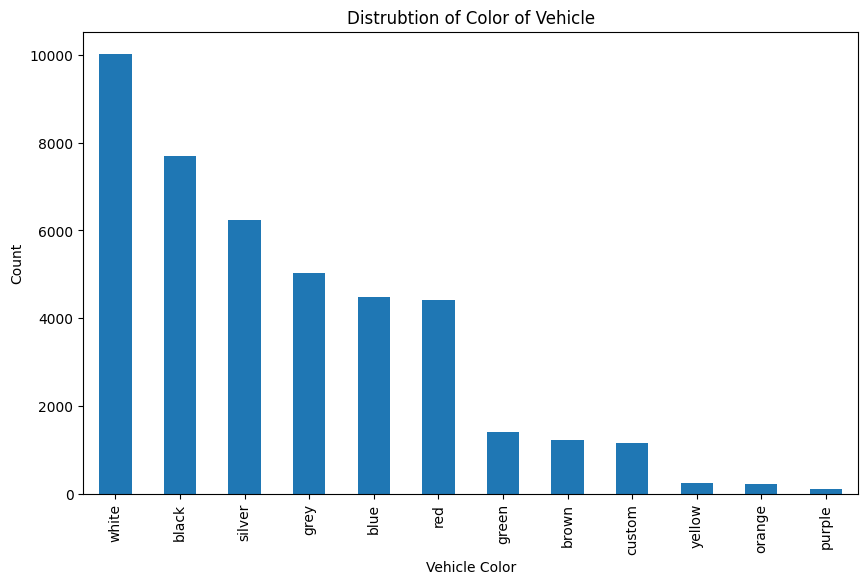

-0.0024560334894256864


In [47]:
# Examine the color of vehicles 
df['paint_color'].value_counts().plot(
    kind='bar',
    figsize=(10,6),
    title='Distrubtion of Color of Vehicle'
)
plt.xlabel('Vehicle Color')
plt.ylabel('Count')
plt.show()

# Correlation coefficient
color_count = df['paint_color'].value_counts()
df['color_count'] = df.groupby('paint_color')['paint_color'].transform('count')
print(df['color_count'].corr(df['days_listed']))

We can see the more popular colors for cars being sold are white, black, silver, and grey. Even with that information, the correlation coefficient shows there is almost no existence of a relationship between the color of a vehicle and the time it spends on the market. 

In [55]:
# Examine if there a specific time of year that shows better results for the sale of cars
# First, need to ensure that the timestamp is in datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'],format= '%Y-%m-%d')

# Extract month number from timestamp and create new column in df
df['month'] = df['date_posted'].dt.month

# Condition for the different seasons
conditions = [
    (df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2),
    (df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5),
    (df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8),
    (df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11)
]

# List named season_labels with the four seasons
season_labels = ['Winter', 'Spring', 'Summer', 'Fall']

# Create season column
df['season'] = np.select(conditions, season_labels, default='Unknown')

# Verify results
df[['date_posted', 'month', 'season']].head()

# Make sure no "Unknown" values
df['season'].value_counts()


season
Fall      13449
Summer    13167
Winter    13030
Spring    11879
Name: count, dtype: int64

In [57]:
# Group df by season and calculate the average days listed
season_speed = df.groupby('season')['days_listed'].mean()

# Sort from fastest to slowest sale times (smaller numbers = faster)
season_speed_sorted = season_speed.sort_values()

# Display results
print(season_speed_sorted)

season
Summer    39.314271
Fall      39.404417
Winter    39.681351
Spring    39.852681
Name: days_listed, dtype: float64


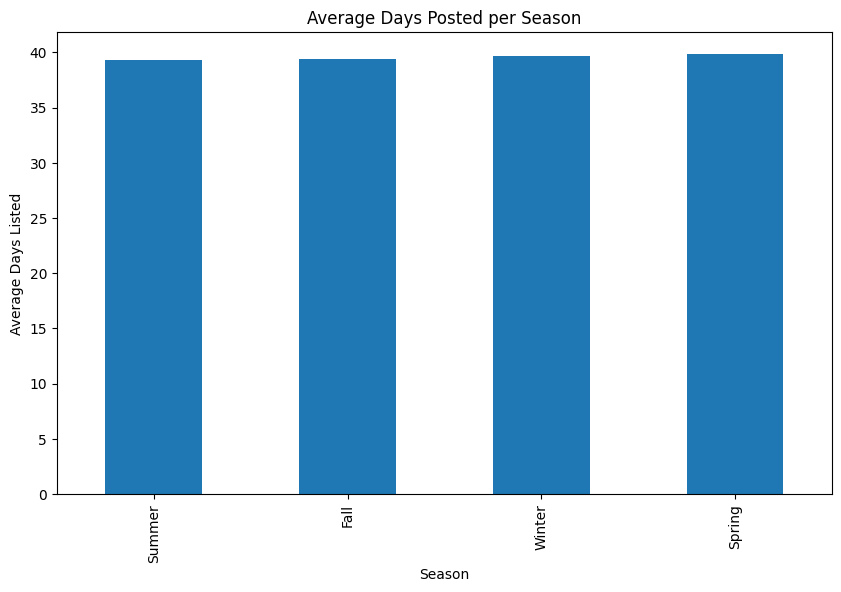

The correlation coefficient is 0.001311488592618531.


In [62]:
# Bar graph for visualization of data
season_speed_sorted.plot(kind='bar', figsize=(10,6))
plt.title('Average Days Posted per Season')
plt.xlabel('Season')
plt.ylabel('Average Days Listed')
plt.show()

# Find correlation coefficient to examine a presence of a relationship or not
df['season_code'] = df['season'].astype('category').cat.codes
season_corr = df['season_code'].corr(df['days_listed'])
print(f'The correlation coefficient is {season_corr}.')
